# **Лекция 2. Корреляция**

## Корреляция

### Свойства корреляции

**Корреляция** - степень линейной взаимосвязи между двумя величинами

1. Изменяется от -1 до 1
2. Положительный коэффициент корреляции свидетельствует о прямой взаимосвязи
3. Отрицательный коэффициент корреляции свидетельствует об обратной взаимосвязи
4. Если корреляция 0 (близка к 0), то между признаками отсутствует линейная взаимосвязь


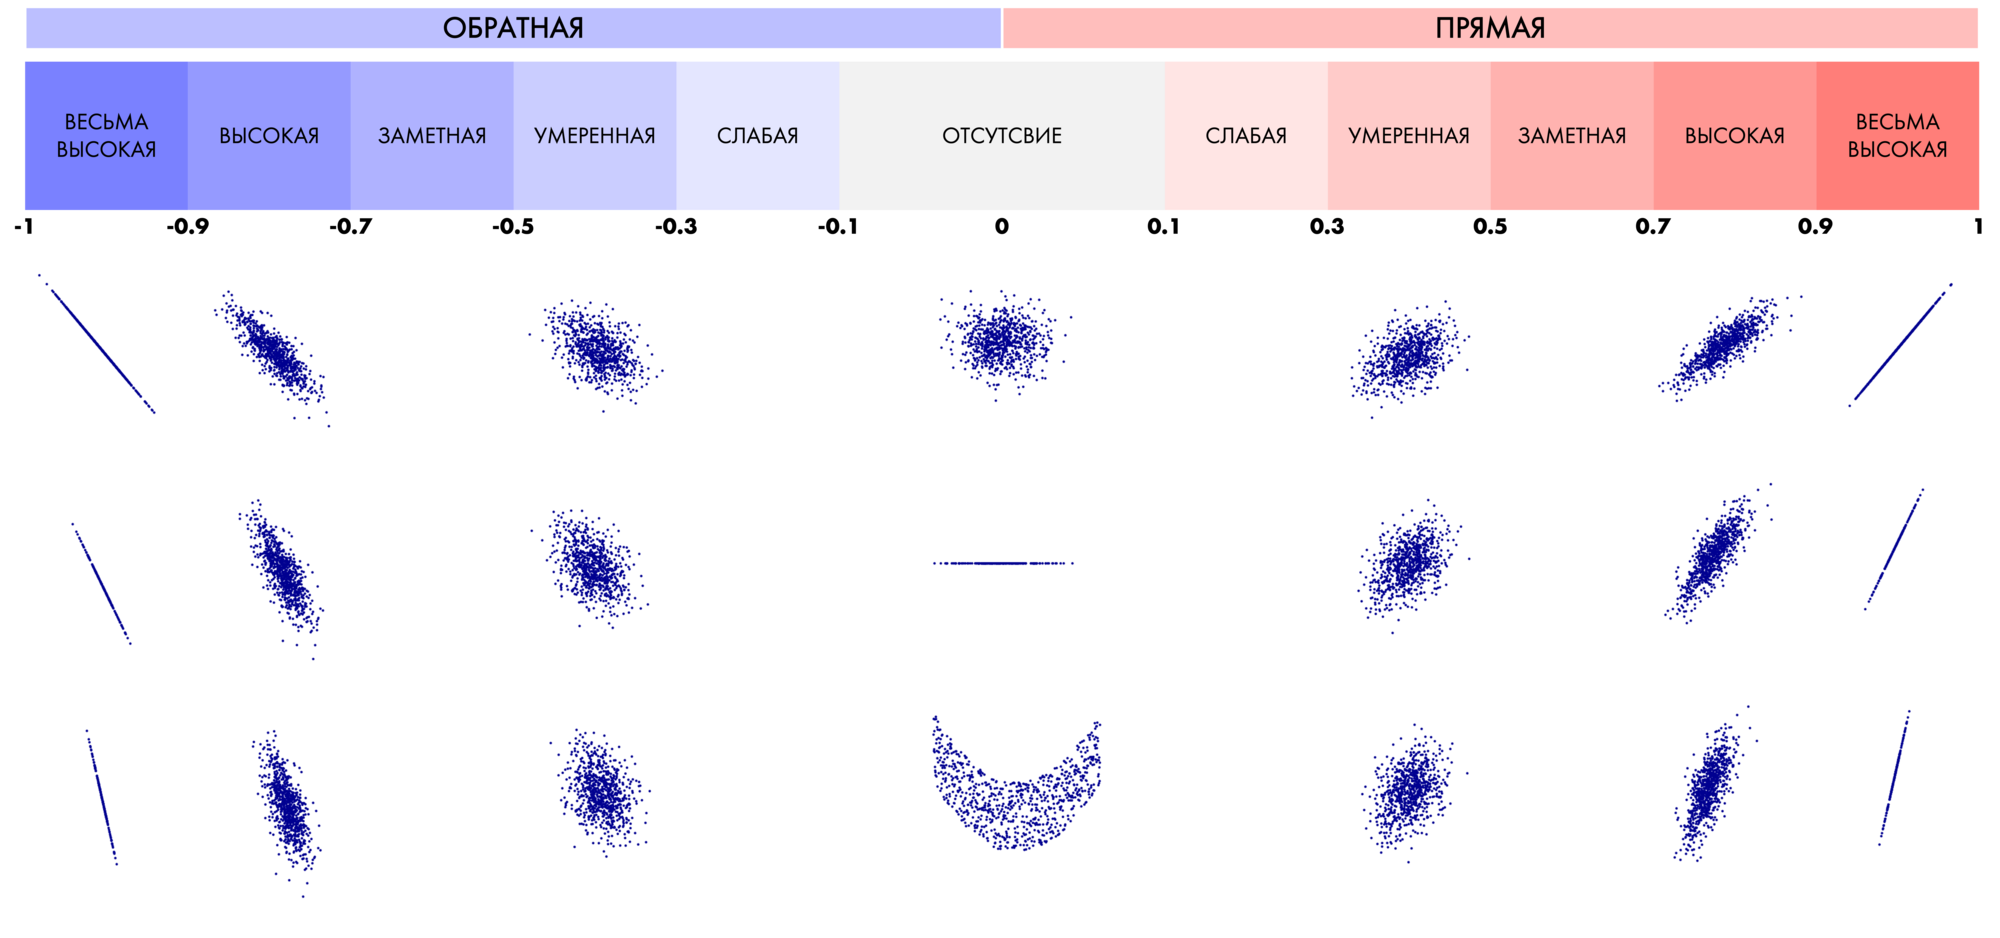

**ОБРАТНАЯ ЛИНЕЙНАЯ ВЗАИМОСЯЗИ**
- $corr<0$
- При **увеличении** одного показателя другой будет **снижаться**

**ОТСУТСТВИЕ ЛИНЕЙНОЙ ВЗАИМОСЯЗИ**
- $corr=0$
- Между признаками отсутвует линейная взаимосвязь

**ПРЯМАЯ ЛИНЕЙНАЯ ВЗАИМОСЯЗИ**
- $corr>0$
- При **увеличении** одного показателя другой будет **увеличиваться**
- При **снижении** одного показателя другой будет **снижаться**



**ВАЖНО!**
1. Корреляция **не подразумевает причинно-следственной связи**. Если между признаками А и Б есть тесная взаимосвязь, то мы **НЕ** можем говорить, что А **влияет** на Б или Б **влияет** на А.
2. Корреляция **чувствительны к выбросам**
3. Коэффициент корреляции Пирсона **НЕ фиксирует нелинейные отношения** между двумя переменными.

### A8

Экономист Степан хочет понять, как годовой валовый внутренний продукт (ВВП) некоторой страны зависит от среднего годового уровня безработицы (УБ) этой страны (обе величины являются непрерывными). Оказалось, что выборочный коэффициент корреляции между ВВП и УБ равен -0.12. Выберите все верные утверждения.

Выберите один или несколько ответов:

+ Между переменными ВВП и УБ существует отрицательная слабовыраженная линейная взаимосвязь.


+ Рассматривая только коэффициент корреляции, нельзя однозначно определить, существует ли причинно-следственная связь между ВВП и УБ.


+ Между переменными ВВП и УБ не существует положительной нелинейной связи.


+ ВВП и УБ являются независимыми величинами.

### А9

Укажите между какими признаками самая сильная обратная корреляция.

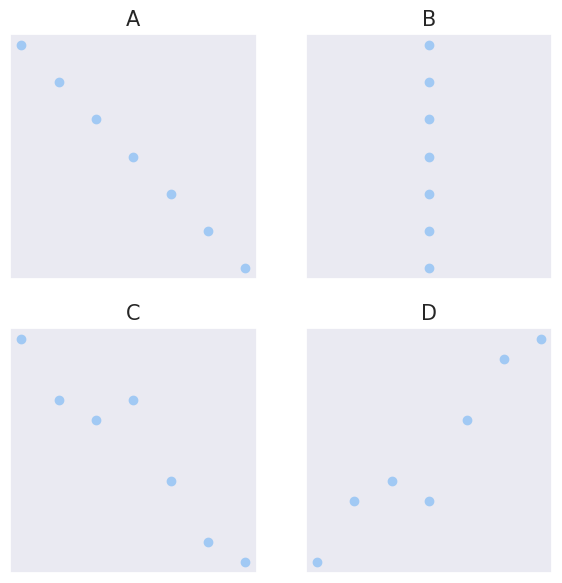

### Данные для анализа

Данные по автомобилям:

**Car_Name** - название автомобиля

**Selling_Price** - цена покупки автомобиля (в млн. рублей)

**Present_Price** - текущая цена автомобиля (в млн. рублей)

**Owner** - наличие предыдущих владельцев (1 - были/0 - нет)

**Kms_Driven** - пробег

**Age** - возраст автомобиля (в годах)

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/prvshnat/hsedata2425/refs/heads/main/cars.csv')
df.head()

,Car_Name,Selling_Price,Present_Price,Owner,Kms_Driven,Age
0,ritz,3.35,5.59,0,27000,10
1,sx4,4.75,9.54,0,43000,11
2,ciaz,7.25,9.85,0,6900,7
3,wagon r,2.85,4.15,0,5200,13
4,swift,4.60,6.87,0,42450,10


### Рассчет коэффицента корреляции `.corr()`

**Коэффициент корреляции Пирсона** позволяет оценить силу и направление линейной взаимосвязи между **ЧИСЛОВЫМИ ДАННЫМИ**


**ПАРНАЯ КОРРЕЛЯЦИЯ**

``` python
датафрейм['колонка 1'].corr(датафрейм['колонка 2'])
```

In [10]:
print(df['Selling_Price'].corr(df['Present_Price'])) #если поменять местами ответ не изменится
 #если поменять местами ответ не изменится

df[['Selling_Price', 'Present_Price']].corr() # еще один вариант программы 

#df[['Selling_Price', 'Present_Price']].corr()

df.corr(numeric_only=True)

0.8789825451614957


,Selling_Price,Present_Price,Owner,Kms_Driven,Age
Selling_Price,1.000000,0.878983,-0.101445,0.029187,-0.236141
Present_Price,0.878983,1.000000,-0.055443,0.203647,0.047584
Owner,-0.101445,-0.055443,1.000000,0.021857,0.146629
Kms_Driven,0.029187,0.203647,0.021857,1.000000,0.524342
Age,-0.236141,0.047584,0.146629,0.524342,1.000000


<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

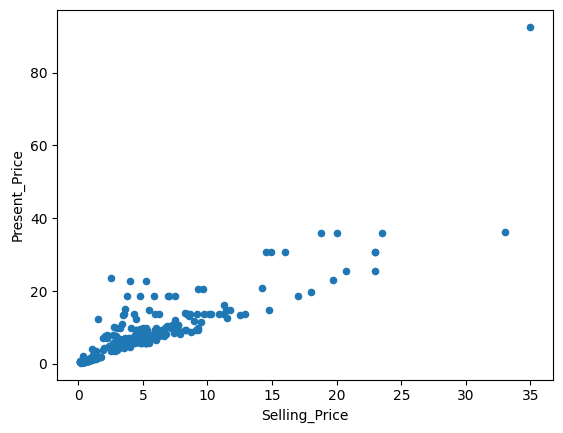

In [12]:
df.plot('Selling_Price', 'Present_Price', kind = "scatter")

+ Между признаками существует высокая прямая линейная зависимость
+ При увеличении цены покупки (**Selling_Price**), текущая цена (**Present_Price**) скорее всего тоже увеличится
+ При снижении цены покупки (**Selling_Price**), текущая цена (**Present_Price**) скорее всего тоже уменьшится

**КОРРЕЛЯЦИОННАЯ МАТРИЦА**

``` python
датафрейм.corr()
```

или

``` python
датафрейм.corr(numeric_only = True)
```

In [10]:
df.corr(numeric_only = True)

,Selling_Price,Present_Price,Owner,Kms_Driven,Age
Selling_Price,1.000000,0.878983,-0.101445,0.029187,-0.236141
Present_Price,0.878983,1.000000,-0.055443,0.203647,0.047584
Owner,-0.101445,-0.055443,1.000000,0.021857,0.146629
Kms_Driven,0.029187,0.203647,0.021857,1.000000,0.524342
Age,-0.236141,0.047584,0.146629,0.524342,1.000000


+ По центральной диагонали 1 (автокорреляция)
+ Симметрична относительна центальной диагонали

### B3. Коэффициент корреляции Пирсона

In [26]:
import pandas as pd

df = pd.DataFrame({"height":  [163.28, 174.13, 178.20, 152.4, 181.40, 173.0, 167.2, 
                               179.0, 176.0, 182.0],
                   'weight':[90.1, 85.4, 87.1, 70.1, 70.7, 65.3, 70.0, 65.3, 70.3, 77.8] })

#df['height'] = [163.28, 174.13, 178.20, 152.4, 181.40, 173.0, 167.2, 179.0, 176.0, 182.0]
#df['weight'] = [90.1, 85.4, 87.1, 70.1, 70.7, 65.3, 70.0, 65.3, 70.3, 77.8]
df.corr().round(3)['weight'].values[0]
#df.corr()

-0.032

In [30]:
df = pd.DataFrame()

df["Количество звонков"] = 	[23,27,	19,	22,	17,	4,	7]
df["Количество часов работы"] =	[6,	6,	6,	6,	4,	2,	2]

df["Количество звонков"].corr(df["Количество часов работы"]).round(2)

0.95

# **Описательные статистики. Пропуски и выбросы.**

In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Меры центральной тенденции**

**Мера центральной тенденции** - такое значение, которое находится в центре распределения и наилучшим способом описывает *типичное* наблюдение из данных

### Среднее арифметическое `.mean()`

**Среднее арифметическое** - число, равное сумме всех чисел выборки или генеральной совокупности, деленной на их количество

+ Не устойчива к выбросам (экстремальным значениям)
+ Рассчитывается для количественных данных

$$
\bar {x} =  \frac {1}{n} \sum _{i=1}^{n}x_{i}
$$

ПРИМЕР:

Выборка/Генеральная совокупность: 1 3 5 6

Среднее арифметическое: (1+3+5+6)/4 = 3,75


In [32]:
df['Age'].mean()

29.69911764705882

### Медиана `.median()`

**Медиана** - это точка ниже и выше которой находится ровно по 50% значений в распределении

+ Устойчива к выбросам (экстремальным значениям)
+ Рассчитывается для количественных данных

In [33]:
df['Age'].median()

28.0

ПРИМЕР (четное количество элементов):

Выборка 1 5 3 6

Поиск медианы:

1. Упорядочим значения: 1 **3 5** 6
2. Найдем среднее значений по середине: (3+5)/2=4
3. 4 это медиана

ПРИМЕР (нечетное кол-во элементов):

Выборка 1 5 3 6 2

Поиск медианы:

1. Упорядочим значения: 1 2 **3** 5 6

2. Найдем значение ровно по середине: 3

3. 3 это медиана

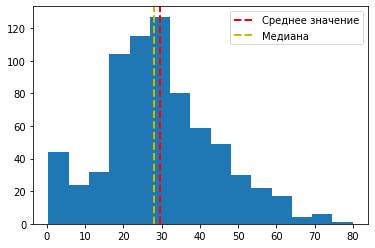

### Мода. `.mode()`

**Мода** — это значение переменной с самой большой частотой, т.е. самое популярное значение переменной

+ Рассчитывается для количественных и категориальных данных

In [34]:
df['Pclass'].mode()

0    3
Name: Pclass, dtype: int64

ПРИМЕР:

Выборка 1 2 2 3 5 5 5 4

Поиск моды:

1. Строим таблицу частотности:

**1** - 1

**2** - 2

**3** - 1

**4** - 1

**5** - 3


2. Чаще всего встречается число 5

3. 5 это мода



ПРИМЕР:

Выборка 1 2 2 2 3 5 5 5 4

Поиск моды:

1. Строим таблицу частотности:

**1** - 1

**2** - 3

**3** - 1

**4** - 1

**5** - 3


2. Чаще всего встречается число 5 и 2

3. 2 и 5 это мода

## **Квартили** `.quantile()`

**Квартили** — это значения, которые делят распределение на четверти

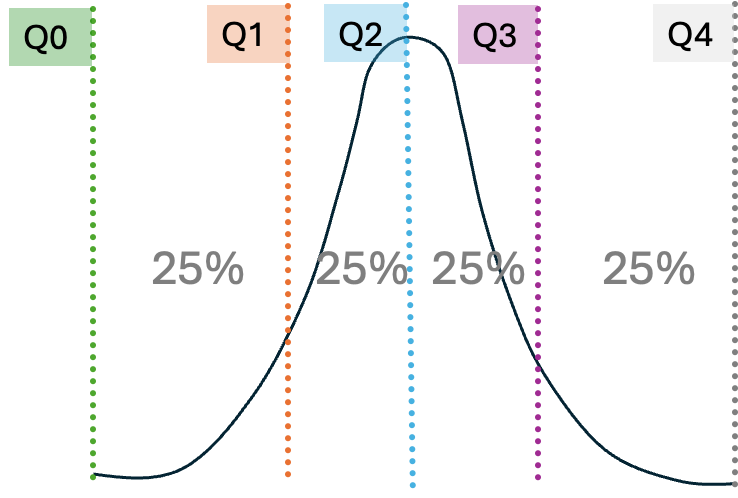

### **Нулевой квартиль Q0 (минимум)** `.min()`/`.quantile(0)`


- значение больше которого 100% данных
- минимум


In [35]:
df['Age'].min()

0.42

In [36]:
df['Age'].quantile(0)

0.42

- Возраст самого маленького пассажира на Титанике 5 месяцев (0.42)
- 100% пассажиров старше 5 месяцев

### **Первый квартиль Q1** `.quantile(0.25)`

- 25% наблюдений меньше Q1
- 75% наблюдений больше Q1


In [42]:
df['Age'].quantile(0.25)

20.125

- 25% пассажиров младше 20 лет
- 75% пассажиров старше 20 лет

### **Второй квартиль Q2 (медиана)** `.median()`/`.quantile(0.5)`

- 50% наблюдений меньше Q2
- 50% наблюдений больше Q2
- медиана


In [38]:
df['Age'].median()

28.0

In [39]:
df['Age'].quantile(0.5)

28.0

- 50% пассажиров младше 28 лет
- 50% пассажиров старше 28 лет
- Срединный возраст пассажиров Титаника 28 лет

### **Третий квартиль Q3** `.quantile(0.75)`

- 75% наблюдений меньше Q3
- 25% наблюдений больше Q3


In [40]:
df['Age'].quantile(0.75)

38.0

- 75% пассажиров младше 38 лет
- 25% пассажиров старше 38 лет

### **Четвертый квартиль Q4 (максимум)** `.max()`/`.quantile(1)`


- значение меньше которого 100% данных
- максимум

In [41]:
df['Age'].max()

80.0

In [ ]:
df['Age'].quantile(1)

80.0

- Возраст самого взрослого пассажира на Титанике 80 лет
- 100% пассажиров младше 80 лет

## **Меры разброса (вариативности)**

**Меры вариативности (разброса)** - это оценка того, насколько данные разбросаны относительно меры центральной тенденции

### Размах

**Размах** — это разница между самым большим и самым маленьким значением переменной

- Не устойчив к экстремальным значениям (выбросам)

In [ ]:
df['Age'].max() - df['Age'].min()

79.58

Амплитуда изменения возраста в данных равна 79.58

ПРИМЕР:

Выборка: 1 2 3 4 5

1. Минимум равен 1
2. Максимум равен 5
3. Размах 5-1=4

ПРИМЕР:

Выборка: 1 2 3 4 5 100

1. Минимум равен 1
2. Максимум равен 100
3. Размах 100-1=99

### Интерквартильный размах

**Интерквартильный размах** — интервал значений признака, содержащий центральные 50% наблюдений распределения, то есть интервал между первым и третьим квартилем

IQR =Q3-Q1

- Устойчив к экстремальным значениям (выбросам)

In [ ]:
df['Age'].quantile(0.75)-df['Age'].quantile(0.25)

17.875

50% наблюдений (между первым и третим квартилем) по признаку возраст находятся в диапазоне 17.875 лет

### Дисперсия `.var()`

**Дисперсия** — среднее квадратов отклонений от среднего арифметического распределения

- Не устойчив к экстремальным значениям (выбросам)

In [ ]:
df["Age"].var()

211.01912474630802

Средний квадрат отклонения от среднего возраста составялает 211 лет^2

### Среднеквадратичное отклонение `.std()`

**Среднеквадратичное отклонение** (стандартное отклонение) — квадратный корень дисперсии. Мера, которая определяет среднее отклонение от среднего арифметического распределения

- Не устойчив к экстремальным значениям (выбросам)

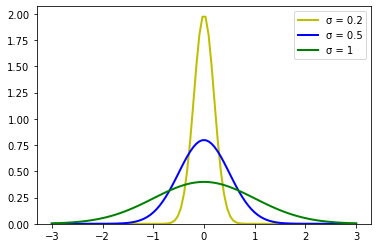

Стандартное отклонение для выборки:

In [ ]:
df["Age"].std()

14.526497332334042

В среднем возраст пассажиров Титаника отклоняется от среднего возраста на 14.5 лет

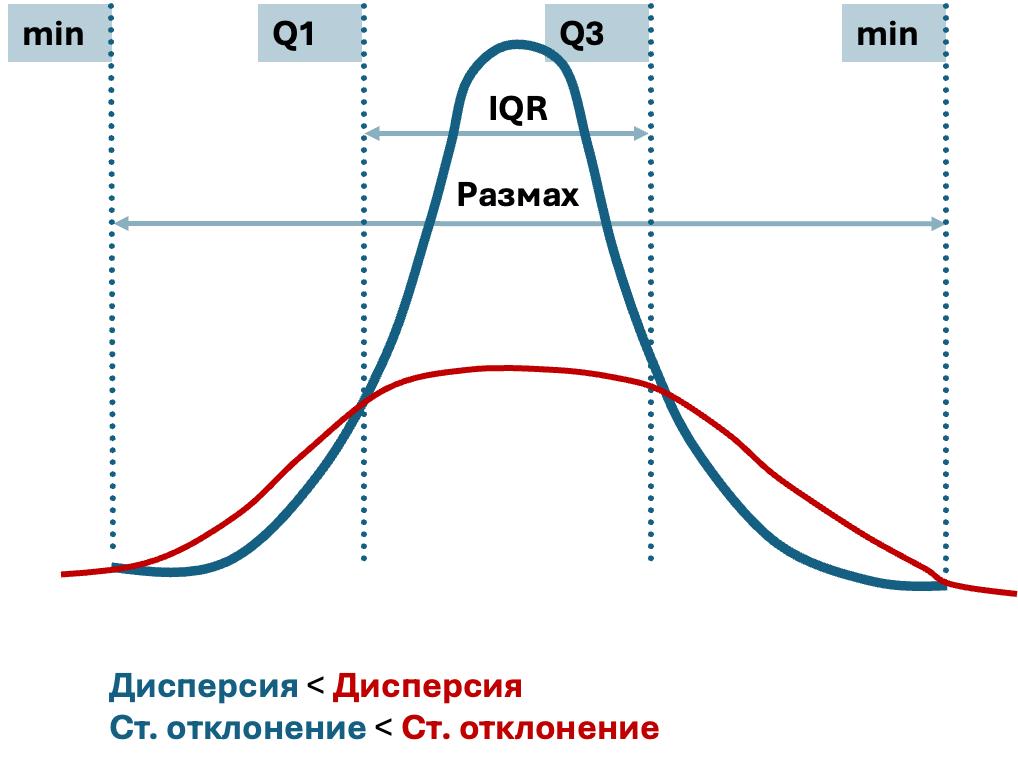

## **Выбор описательной статистики**

**Меры центральной тенденции**:

- Количественные (числовые данные):
  - среднее арифметическое
  - медиана
  - мода
  - *квартили*
- Категориальные номинальные/порядковые:
  - мода
- Категориальные номинальные бинарные (закодированы 0/1):
  - мода
  - среднее арифметическое (показывает долю 1 в данных)

**Меры вариативности (разброса)**:
- Количественные (числовые данные):
  - Размах
  - Интерквартильный размах (*устойчива к выбросам*)
  - Дисперсия
  - Стандартное отклонение
- Категориальные данные:
  - Количество уникальных значений `.nunique()`
  - *Частота/Частотная таблица*


## **A4**

Какую меру измерения центральной тенденции корректно использовать для переменной с информацией об уровне образования, закодированной числами? (1 – средняя школа, 2 ⁠— бакалавриат, 3 ⁠— магистратура, 4 ⁠— аспирантура).


- Медиана
- Дисперсия
- Среднее арифметическое
- Мода

## **B3**

### Демо

Укажите самое часто встречаемое значение признака walk.

In [ ]:
df = pd.read_csv('flats.csv')
df['walk'].mode().values[0]

1

### 1

Укажите значение, меньше которого 25% наблюдений признака humidity? Ответ округлите до двух знаков.

### 2

Укажите длину интервала, в котором лежит 50% центральных данных признака calcium. Ответ округлите до двух знаков.

### 3

Для признака Region (регион) рассчитайте интерпретируемую меру вариативности. Ответ округлите до двух знаков.

### 4

Для признака Sex (пол) рассчитайте меру центральной тенденции, показывающую долю женщин (1) в данных. Ответ округлите до двух знаков.

### 5

Рассчитайте интерпретируемую меру центральной тенденции для признака Soil_Type (тип почвы). Ответ округлите до двух знаков.

## **Распределение данных**

### Симметричные распределения

+ **Мода** пик(и) распаспределение
+ **Медиана** = **среднее арифметическое** и находятся по середине
+ В данных нет экстремальных значений

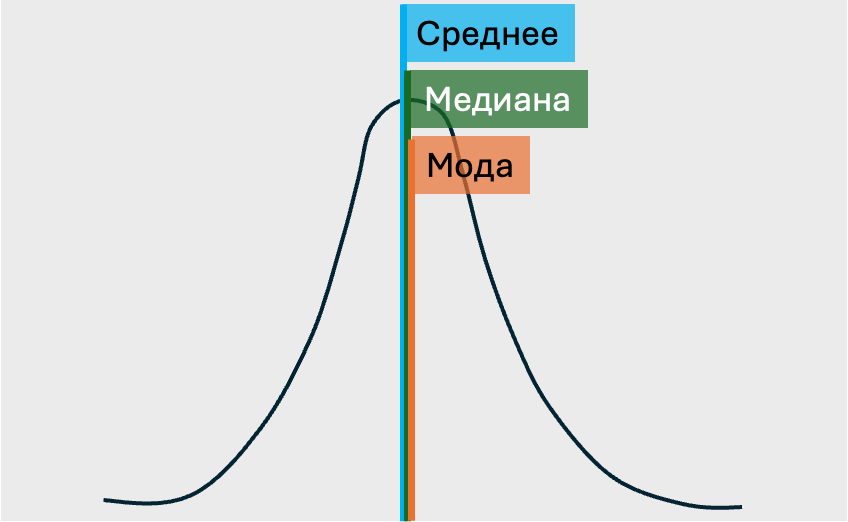

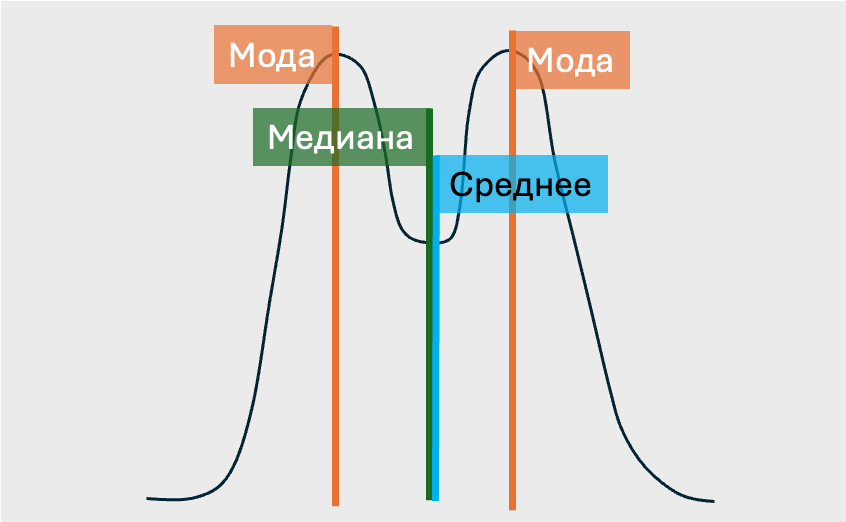

### Несимметричные распределения

+ **Мода** пик(и) расппределения
+ **Среднеe арифметическоe** < **медины**, среднее левее медианы
+ В данных есть экстремально **низкие** значения

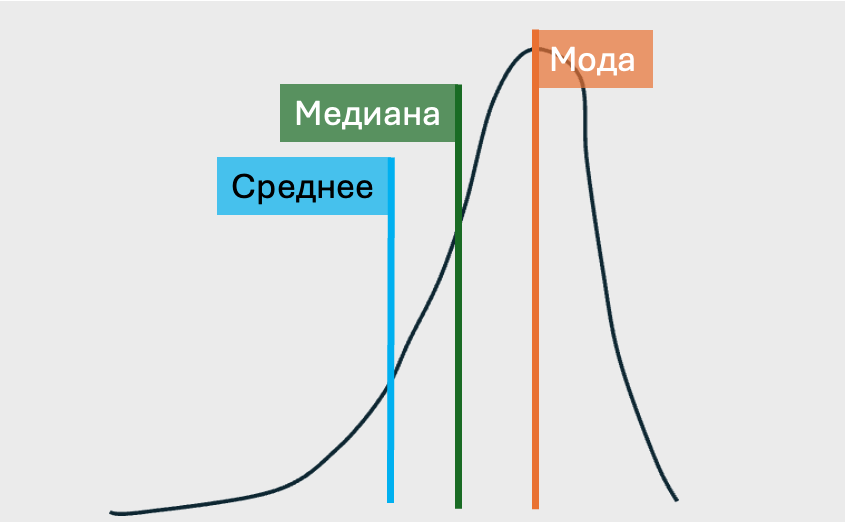

**ПРИМЕР**

**Выборка 1**: 1 2 3 4

Среднее = (1+2+3+4)/4 = 2.5

Медиана = (2+3)/2 = 2.5


**Выборка 2**: -100 1 2 3 4

Среднее = (1+2+3+4-100)/4 = -22.5

Медиана = 2

+ **Мода** пик(и) расппределения
+ **Среднеe арифметическоe** > **медины**, среднее правее медианы
+ В данных есть экстремально **высокие** значения

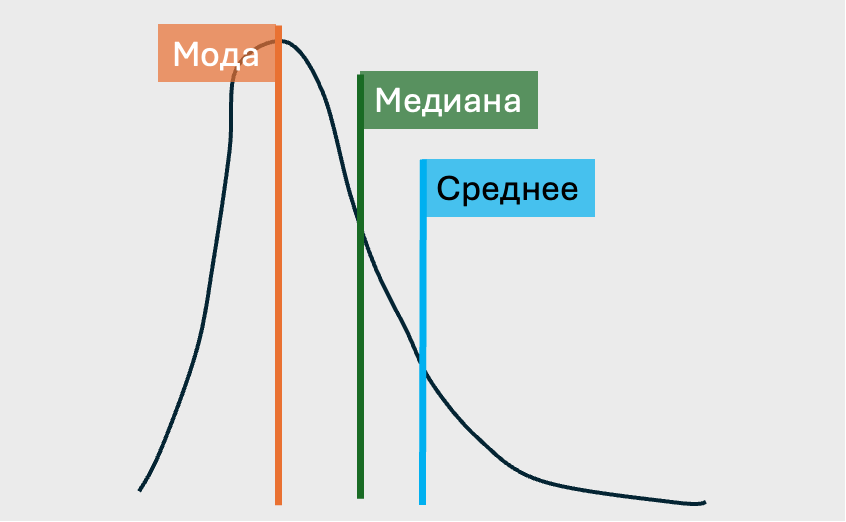

**ПРИМЕР**

**Выборка 1**: 1 2 3 4

Среднее = (1+2+3+4)/4 = 2.5

Медиана = (2+3)/2 = 2.5


**Выборка 2**: 1 2 3 4 100

Среднее = (1+2+3+4+100)/4 = 27.5

Медиана = 3

## **A5** (1)

У нас есть данные о численности зайцев и рысей в отдельно взятом лесу за 20 лет. Изучите описательные статистики в таблице и выберите верное утверждение:
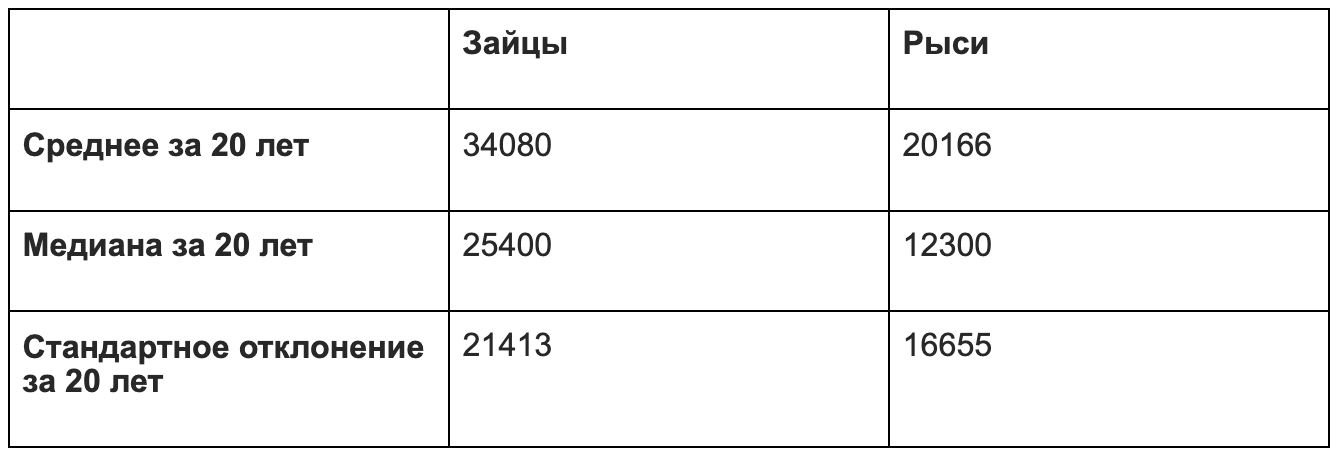

+ Разница между медианой и средним значением для численности рысей может свидетельствовать о том, что в некоторые годы численность популяции рысей была экстремально высокой.
+ В популяции рысей наблюдается большая вариативность показателей.
+ Разница между медианой и средним значением для численности зайцев может свидетельствовать о том, что в некоторые годы численность популяций зайцев была экстремально низкой.
+ Гарантированно, что в один из годов в популяции рысей было 20166 особей.

## **A5** (2)

Анатолий изучает популяцию зайцев, лис, медведей и белок в лесу за некоторый период времени. Известно, что среднее значение численности зайцев больше, чем медианное значение по этому признаку за изучаемый период. Определите, какой из графиков может визуализировать распределение зайцев в лесу.

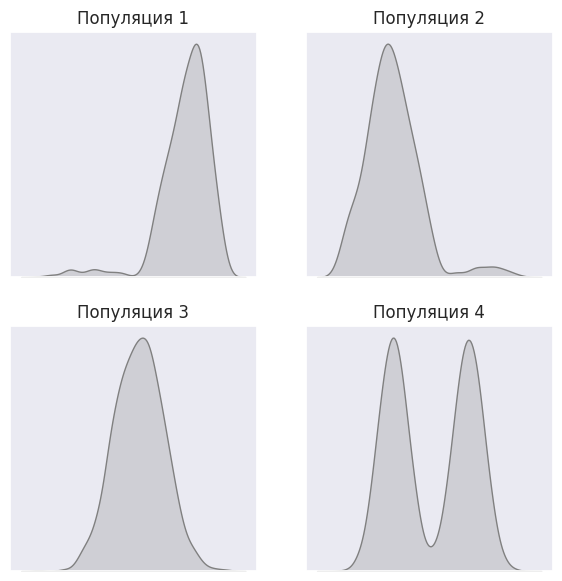

## **Пропущенные значения**

Обозначаются в датафрейме как `NaN`, то есть пропуск информации

### Поиск пропусков

Количество пропусков в каждом столбце

```
датафрейм.isna().sum()
```


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Доля пропусков в каждом столбце

```
датафрейм.isna().mean()
```


In [ ]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Просмотр пропусков

In [ ]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Если нужно все кроме пропусков, то тогда так:

In [ ]:
df[df['Age'].isna()==False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Работа с пропусками

-  Если в колонке пропусков больше чем 40%:
 -   **колонку удаляем**

-  Если в колонке пропущено меньше чем 40% данных:
 - **удаляем** все **строчки**, в которых есть пропуски (когда данных много)
 - **заменяем** все **строчки**, в которых есть пропуски (когда данных не очень много)

In [ ]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#### Пропусков больше чем 40%

Удаление колонки:



``` python
датафрейм.drop('название колонки', axis=1) #просто покажет датасет без этой колонки (можно сохранить в новую переменную)
```

``` python
датафрейм.drop('название колонки', axis=1, inplace=True) #правда удалит колонку из изначального датафрейма
```

In [ ]:
df.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df.drop(2, axis = 0, inplace = True)

Удаление колонок:



``` python
датафрейм.drop(['название колонки 1', 'название колонки 2'], axis=1) #просто покажет датасет без этой колонки (можно сохранить в новую переменную)
```

In [ ]:
df.drop(['Age', 'Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_fillna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


#### Пропущено меньше чем 40% данных

##### **Удаляем строки с пропусками**

Удаляем все строчки, хотя бы с одним пропуском



``` python
датафрейм.dropna(subset = ['название колонки'], axis=1) #просто покажет датасет без nan (можно сохранить в новую переменную)
```

``` python
датафрейм.dropna(subset = ['название колонки'], inplace=True) #правда удалит nan из изначального датафрейма
```

In [ ]:
df.dropna(subset = ['Cabin'], axis = 0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Удаляем все строчки, в которых есть пропуски в определенной колонке

In [ ]:
df.dropna(subset = ['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_fillna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


##### **Замена на МЦТ**

**Количественные данные** - медиана

**Категориальные данные** - мода

Количественный признак:

In [ ]:
med = df['Age'].median() #Ищем эту меру центральной тенденции
df['Age_fillna'] = df['Age'].fillna(med) #заменяем все пропуски в столбце возраст на Медиану
df[df['Age'].isna()] #Проверяем, что все пропуски заменились

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillna
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,28.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,28.0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,28.0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,28.0


Категориальный признак:

In [ ]:
mode = df['Embarked'].mode()[0] #Ищем моду
df['Embarked_fillna'] = df['Embarked'].fillna(mode) #заменяем все пропуски в столбце порт на моду
df[df['Embarked'].isna()] #проверяем, что замена случилась

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_fillna,Age_fillna
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,S,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,S,62.0


## **Выбросы**

**Выброс** — это аномальное значение в данных, которое значительно отличается от значения, выраженного мерой центральной тенденции и в целом от распределения данных в выборке



<Axes: >

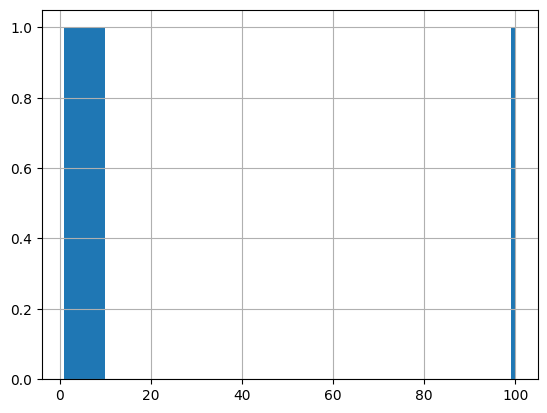

In [43]:
pd.Series([1,2,3,4,5,6,7,8,9,100]).hist(bins=100)

Два способа найти выбросы:
- IQR*1.5
- N *std

### N*std

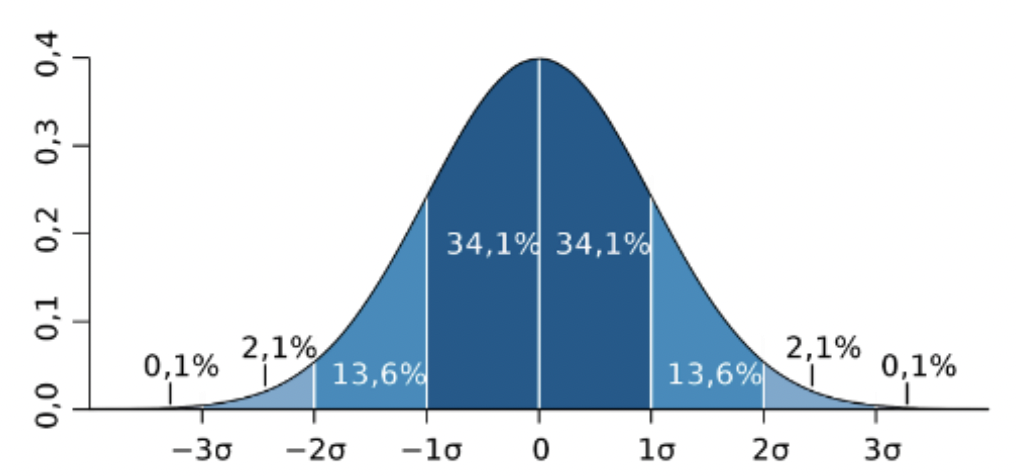

Если распределение данных нормальное:

- если брать **1 стандартное отклонение** от среднего, то НЕ выбросами будут считаться **68,2%** центральных данных

- если брать **2 стандартных отклонения** от среднего, то НЕ выбросами будут считаться **95,5%** центральных данных

- если брать **3 стандартных отклонения** от среднего, то НЕ выбросами будут считаться **99,7%** центральных данных (а выбросами соответственно 0,2-0,3%)

1. Находим среднее

In [ ]:
avg = df['Age_fillna'].mean()
avg

29.36158249158249

2. Находим стандартное отклонение (всегда задаемся вопросом с чем мы работаем, с выборкой или генеральной совокупностью)

In [ ]:
std = df['Age_fillna'].std()
std

13.019696550973201

3. Находим границы интервала, все значения за пределами которого буду считаться выбросами

In [ ]:
low2 = avg-3*std #можно посчитать отклонение и на одно, и на два, и на три
low2

-9.697507161337114

In [ ]:
up2 = avg+3*std
up2

68.42067214450209

3. Сделаем фильтрацию и посчитаем те значения, которые являются выбросами

In [ ]:
df[(df['Age_fillna']<low2) | (df['Age_fillna']>up2)].shape[0]

7

4. Или те, которые считаются выбросами:

In [ ]:
df[(df['Age_fillna']>=low2) & (df['Age_fillna']<=up2)].shape[0]

884

Дастасет без выбросомв можно сохранить в новую переменную и дальше работать с ним:

In [ ]:
df_clean = df[(df['Age_fillna']>=low2) & (df['Age_fillna']<=up2)]
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_fillna,Age_fillna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S,35.0


### 1.5*IQR

1. Находим интерквартильное расстояние

In [ ]:
q1=df['Age_fillna'].quantile(0.25)
q1

22.0

In [ ]:
q3=df['Age_fillna'].quantile(0.75)
q3

35.0

In [ ]:
iqr = q3-q1
iqr

13.0

2. Находим границы интервала, все значения за пределами которого буду считаться выбросами

In [ ]:
low1 = q1 - iqr*1.5 #нижняя границы
low1

2.5

In [ ]:
up1 = q3 + iqr*1.5 #верхняя граница
up1

54.5

3. Сделаем фильтрацию и посчитаем те значения, которые являются выбросами

In [ ]:
df[(df['Age_fillna']<low1) | (df['Age_fillna']>up1)].shape[0]

66

4. А теперь посмотрим на распределение данных без учета выбросов

In [ ]:
df[(df['Age_fillna']>=low1) & (df['Age_fillna']<=up1)].shape[0]

825

## **Ящик с усами** `.plot(kind = 'box', vert = False)`

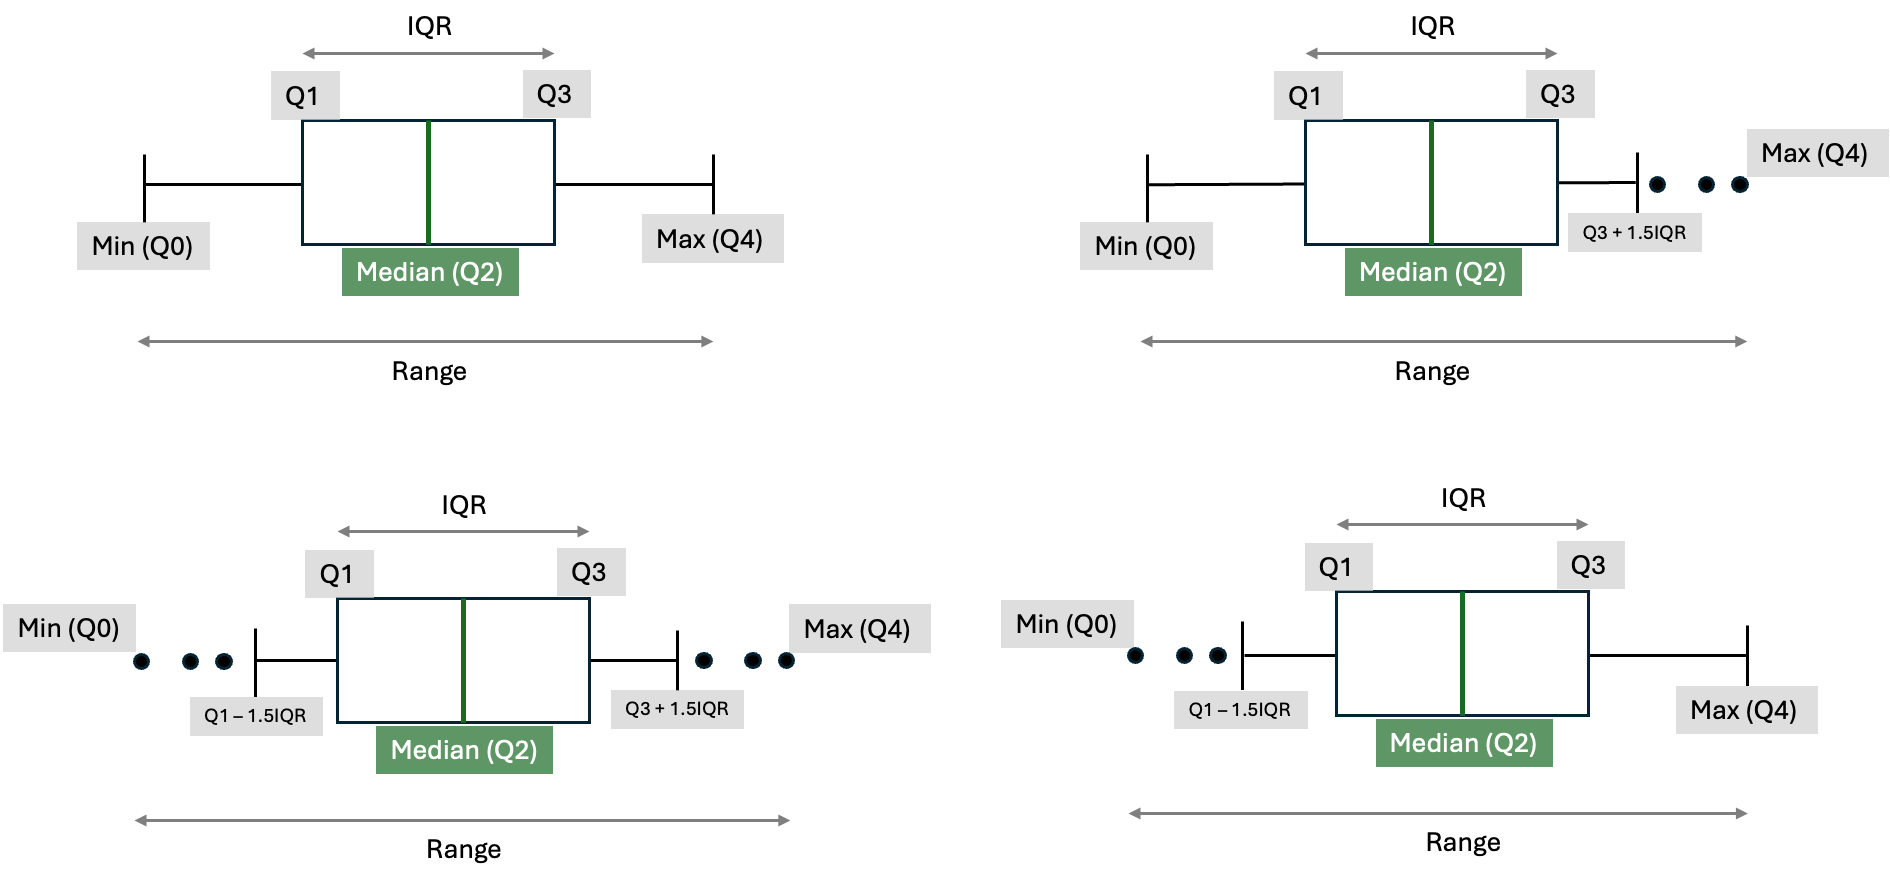

<Axes: >

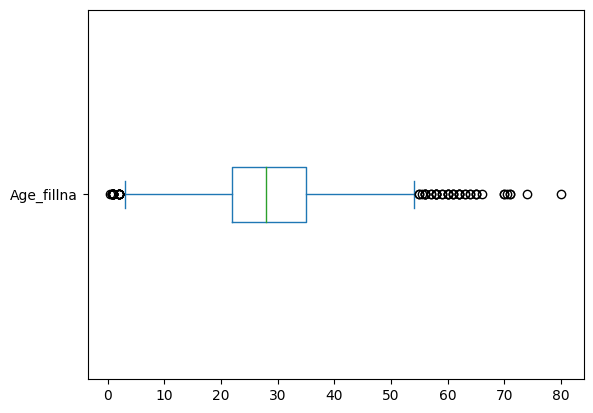

In [ ]:
df['Age_fillna'].plot(kind = 'box', vert = False) #vert = False, чтобы ящик был горизонтальный

## **A6**

Семен собирал данные о количестве посетителей Ярмарки меда в течение года. Он визуализировал полученные результаты с помощь графика, представленного ниже. Отметьте верное утверждение.

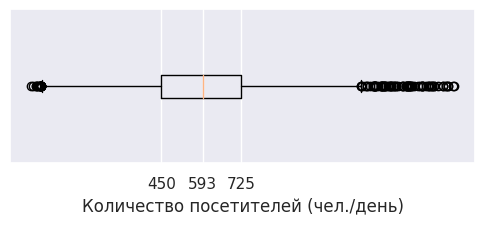


- 25% дней в году Ярмарку меда посещают более 593 человек в день


- Интеквартильное расстояние количества посетителей Ярмарки меда составляет 143


- 25% дней в году Ярмарку меда посещают более 725 человек в день


- В среднем Ярмарку меда посещают 593 человека в день